In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('df_inversion_minera_desarrollo_preparacion_2000_2024.csv')

In [ ]:
df.head(40)

,id,año,region,mes,inversion_mensual
0,1,2000,AMAZONAS,enero,0.00
1,2,2000,AMAZONAS,julio,0.00
2,3,2000,ICA,julio,0.00
3,4,2000,ICA,agosto,0.00
4,5,2000,ICA,setiembre,0.00
5,6,2000,ICA,octubre,0.00
6,7,2000,ICA,noviembre,0.00
7,8,2000,ICA,diciembre,0.00
8,9,2000,AMAZONAS,junio,0.00
9,10,2000,ICA,NaN,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8125 entries, 0 to 8124
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8125 non-null   int64  
 1   año                8125 non-null   int64  
 2   region             8125 non-null   object 
 3   mes                7500 non-null   object 
 4   inversion_mensual  7998 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 317.5+ KB


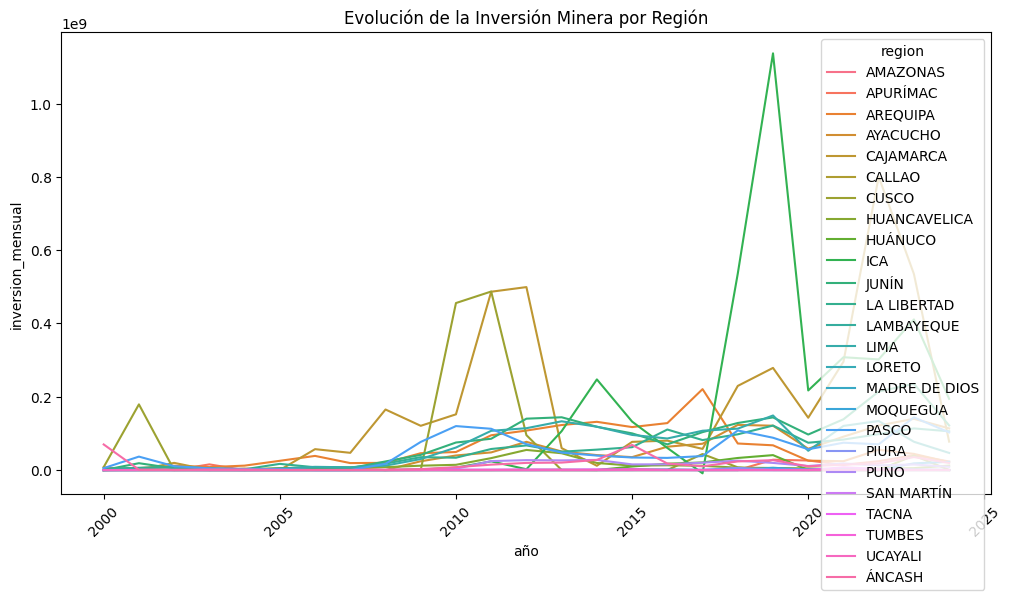

In [ ]:
# Agrupamos por año y región para obtener la inversión total anual
inversion_anual = df.groupby(['año', 'region'])['inversion_mensual'].sum().reset_index()

# Gráfico de línea por región
plt.figure(figsize=(12, 6))
sns.lineplot(x='año', y='inversion_mensual', hue='region', data=inversion_anual)
plt.title("Evolución de la Inversión Minera por Región")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df_filled = df.copy()
for (region, año), group in df_filled.groupby(['region', 'año']):
    # Encontrar los meses faltantes en el grupo actual
    all_months = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'setiembre', 'octubre', 'noviembre', 'diciembre']
    months_present = group['mes'].dropna().unique()
    missing_months = [month for month in all_months if month not in months_present]

    # Asignar los meses faltantes a los valores NaN en 'mes'
    for month in missing_months:
        nan_rows = df_filled[(df_filled['region'] == region) & (df_filled['año'] == año) & (df_filled['mes'].isna())]
        if not nan_rows.empty:
            df_filled.loc[nan_rows.index[0], 'mes'] = month

In [ ]:
df_filled['inversion_mensual'].fillna(0.0, inplace=True)
null_counts_after_fill = df_filled.isnull().sum()


<ipython-input-12-75b1ad347125>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['inversion_mensual'].fillna(0.0, inplace=True)


In [ ]:
df_filled['mes'].fillna('mes_faltante', inplace=True)
null_counts_final = df_filled.isnull().sum()


<ipython-input-14-66be495b45bc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled['mes'].fillna('mes_faltante', inplace=True)


In [ ]:
null_counts_final

,0
id,0
año,0
region,0
mes,0
inversion_mensual,0


# XGboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
label_encoder_region = LabelEncoder()
label_encoder_mes = LabelEncoder()

In [ ]:
df_filled['region_encoded'] = label_encoder_region.fit_transform(df_filled['region'])
df_filled['mes_encoded'] = label_encoder_mes.fit_transform(df_filled['mes'])


In [ ]:
X = df_filled[['año', 'region_encoded', 'mes_encoded']]
y = df_filled['inversion_mensual']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
xgb_model = XGBRegressor(
    n_estimators=50,  # Número de árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=3,  # Profundidad máxima
    subsample=0.8,  # Submuestreo
    colsample_bytree=0.8,  # Submuestreo de características
    random_state=42
)

In [ ]:
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_model.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 70158972339192.695
R-squared (R2): 0.332698419233014


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=100,  # Número de árboles
    max_depth=10,  # Profundidad máxima
    random_state=42
)

In [ ]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
rf_y_pred = rf_model.predict(X_test)


In [ ]:
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

In [ ]:
print("Random Forest Mean Squared Error (MSE):", rf_mse)
print("Random Forest R-squared (R2):", rf_r2)

Random Forest Mean Squared Error (MSE): 100328126880403.0
Random Forest R-squared (R2): 0.04575116438408722


In [ ]:
y_train = pd.Series(y_train).fillna(0.0)
y_test = pd.Series(y_test).fillna(0.0)


# SVR

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)  # Parámetros ajustables


In [ ]:
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

In [ ]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [ ]:
mse_svr, r2_svr

(109672999068260.78, -0.04313052494389957)

# Estandarización de los datos para mejora en modelos

In [ ]:
from sklearn.preprocessing import StandardScaler


Escalado de variables

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
xgb_model_scaled = XGBRegressor(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [ ]:
xgb_model_scaled.fit(X_train_scaled, y_train_scaled)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb_scaled = xgb_model_scaled.predict(X_test_scaled)
mse_xgb_scaled = mean_squared_error(y_test_scaled, y_pred_xgb_scaled)
r2_xgb_scaled = r2_score(y_test_scaled, y_pred_xgb_scaled)

In [ ]:
rf_model_scaled = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
rf_model_scaled.fit(X_train_scaled, y_train_scaled)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
y_pred_rf_scaled = rf_model_scaled.predict(X_test_scaled)
mse_rf_scaled = mean_squared_error(y_test_scaled, y_pred_rf_scaled)
r2_rf_scaled = r2_score(y_test_scaled, y_pred_rf_scaled)

In [ ]:
mse_xgb_scaled, r2_xgb_scaled, mse_rf_scaled, r2_rf_scaled


(70158972339192.695,
 0.332698419233014,
 99118412528720.67,
 0.057257095446637485)

In [ ]:
y_train = pd.Series(y_train).fillna(0.0)
y_test = pd.Series(y_test).fillna(0.0)

In [ ]:
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

In [ ]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [ ]:
mse_svr, r2_svr

(109616416200662.22, -0.042592349487019954)

# Revisando los modelos en la vida real


In [ ]:
# Creamos datos para visualizar las inversiones a futuro
unique_regions = df['region'].unique()
future_years = np.tile(range(2025, 2031), len(unique_regions) * 12)
future_months = np.tile(label_encoder_mes.classes_, 6 * len(unique_regions))
future_regions = np.repeat(unique_regions, 12 * 6)


min_len = min(len(future_years), len(future_months), len(future_regions))
future_years = future_years[:min_len]
future_months = future_months[:min_len]
future_regions = future_regions[:min_len]

future_data_all_regions = pd.DataFrame({
    'año': future_years,
    'region': future_regions,
    'mes': future_months
})

# Codificar las columnas categóricas
future_data_all_regions['region_encoded'] = label_encoder_region.transform(future_data_all_regions['region'])
future_data_all_regions['mes_encoded'] = label_encoder_mes.transform(future_data_all_regions['mes'])

# Estandarizar los datos futuros
future_data_scaled_all_regions = scaler.transform(future_data_all_regions[['año', 'region_encoded', 'mes_encoded']])

# Generar predicciones para los modelos
future_data_all_regions['Predicción_XGBoost'] = xgb_model_scaled.predict(future_data_scaled_all_regions)
future_data_all_regions['Predicción_Random_Forest'] = rf_model_scaled.predict(future_data_scaled_all_regions)
future_data_all_regions['Predicción_SVR'] = svr_model.predict(future_data_scaled_all_regions)


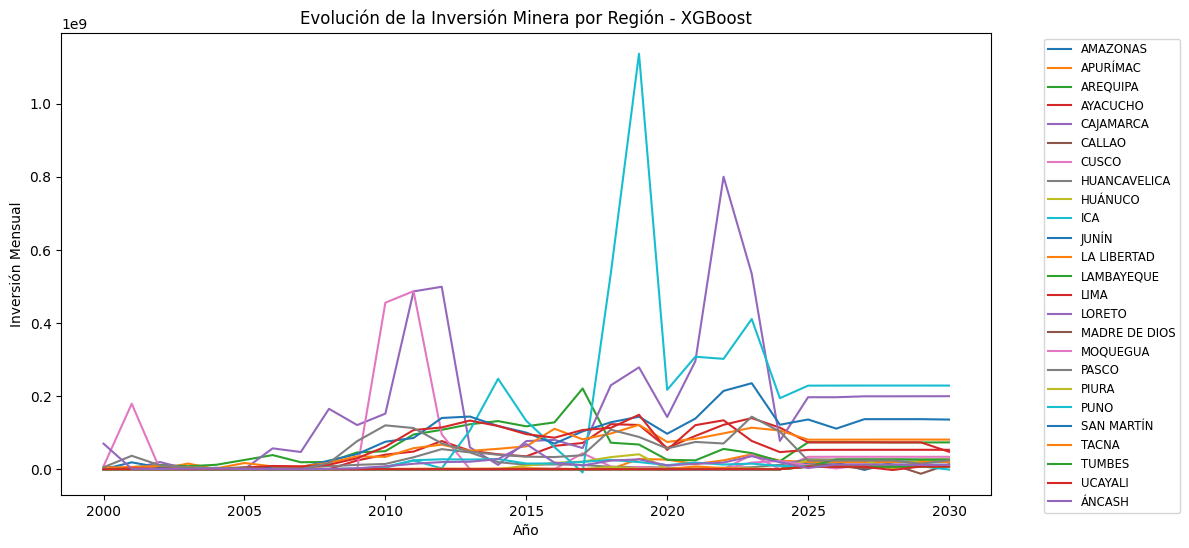

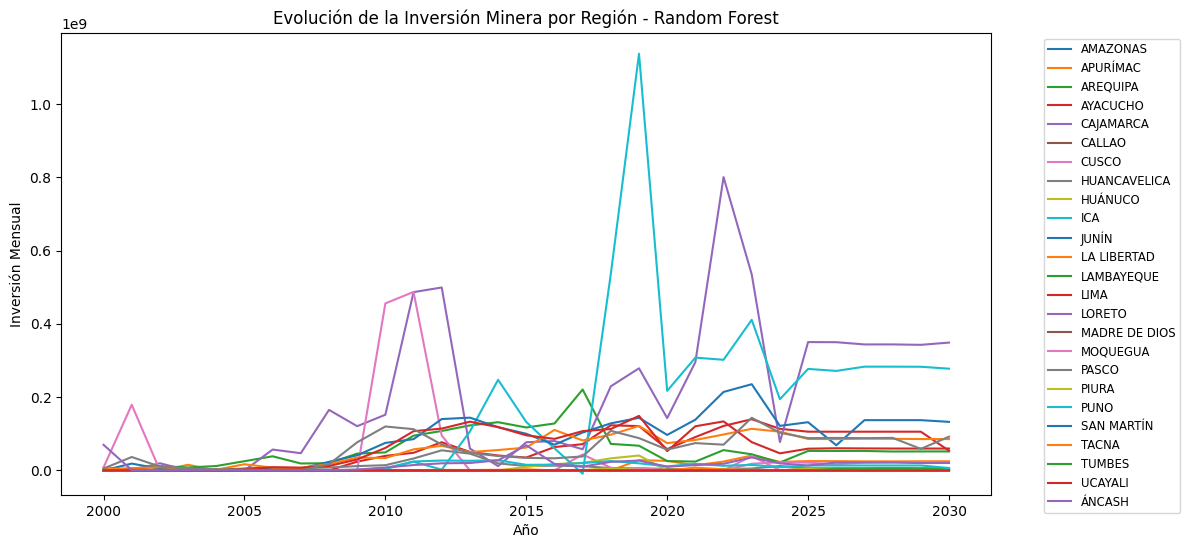

In [ ]:
predictions_xgb = future_data_all_regions[['año', 'region', 'Predicción_XGBoost']]
predictions_xgb = predictions_xgb.rename(columns={'Predicción_XGBoost': 'inversion_mensual'})
predictions_rf = future_data_all_regions[['año', 'region', 'Predicción_Random_Forest']]
predictions_rf = predictions_rf.rename(columns={'Predicción_Random_Forest': 'inversion_mensual'})

# Concatenar las predicciones al dataset original
xgb_data = pd.concat([df, predictions_xgb])
rf_data = pd.concat([df, predictions_rf])

# Generar gráficos para XGBoost y Random Forest

# XGBoost
plt.figure(figsize=(12, 6))
xgb_annual = xgb_data.groupby(['año', 'region'])['inversion_mensual'].sum().reset_index()
for region in xgb_annual['region'].unique():
    region_data = xgb_annual[xgb_annual['region'] == region]
    plt.plot(region_data['año'], region_data['inversion_mensual'], label=region)
plt.title("Evolución de la Inversión Minera por Región - XGBoost")
plt.xlabel("Año")
plt.ylabel("Inversión Mensual")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

# Random Forest
plt.figure(figsize=(12, 6))
rf_annual = rf_data.groupby(['año', 'region'])['inversion_mensual'].sum().reset_index()
for region in rf_annual['region'].unique():
    region_data = rf_annual[rf_annual['region'] == region]
    plt.plot(region_data['año'], region_data['inversion_mensual'], label=region)
plt.title("Evolución de la Inversión Minera por Región - Random Forest")
plt.xlabel("Año")
plt.ylabel("Inversión Mensual")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

# RED NEURONAL

In [ ]:
pip install tensorflow

In [ ]:
dataset = df_filled.sort_values(by=['año', 'mes', 'region'])

In [ ]:
dataset = df_filled[['año', 'mes_encoded', 'region_encoded', 'inversion_mensual']].dropna()


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(dataset[['año', 'mes_encoded', 'region_encoded', 'inversion_mensual']])


In [ ]:
sequence_length = 12  # Use the last 12 months as input
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :-1])  # All columns except target
    y.append(scaled_data[i, -1])  # Target: inversion_mensual
X, y = np.array(X), np.array(y)

In [ ]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [ ]:
model = Sequential([
    Flatten(input_shape=(12, 3)),  # Flatten the 3D input to 2D
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='linear')  # Output layer
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0351 - val_loss: 0.0015
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.5485e-04 - val_loss: 0.0011
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.3129e-04 - val_loss: 0.0011
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5690e-04 - val_loss: 0.0011
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5523e-04 - val_loss: 0.0011
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0918e-04 - val_loss: 0.0011
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9786e-04 - val_loss: 0.0011
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6554e-04 - val_loss: 0.0011
Epoch 10/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8792e-04 - val_loss: 0.0011
Epoch 11/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1896e-04 - val_loss: 0.0011
Epoch 12/20
163/

In [ ]:
y_pred = model.predict(X_test)
y_test_inverse = scaler.inverse_transform(np.concatenate([np.zeros((len(y_test), 3)), y_test.reshape(-1, 1)], axis=1))[:, -1]
y_pred_inverse = scaler.inverse_transform(np.concatenate([np.zeros((len(y_pred), 3)), y_pred], axis=1))[:, -1]

mse = mean_squared_error(y_test_inverse, y_pred_inverse)
r2 = r2_score(y_test_inverse, y_pred_inverse)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 296838716079776.44
R-squared (R2): -0.0004423902187788986


# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
df_copy = dataset.copy()

In [ ]:
numeric_cols = df_copy.select_dtypes(include=['float64', 'int64']).columns
data_numeric = df_copy[numeric_cols].dropna()


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [ ]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


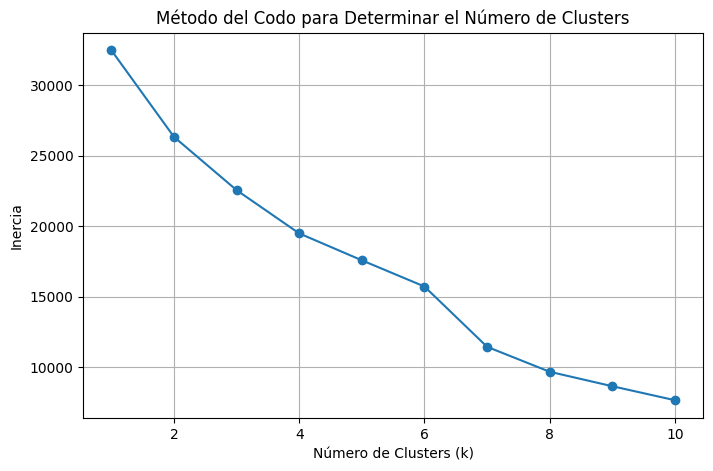

In [ ]:
# Graficando el metodo del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Determinar el Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 3  # Cambiar según el gráfico del codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

In [ ]:
df_copy['Cluster'] = clusters

In [ ]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df_copy['PCA1'] = data_pca[:, 0]
df_copy['PCA2'] = data_pca[:, 1]


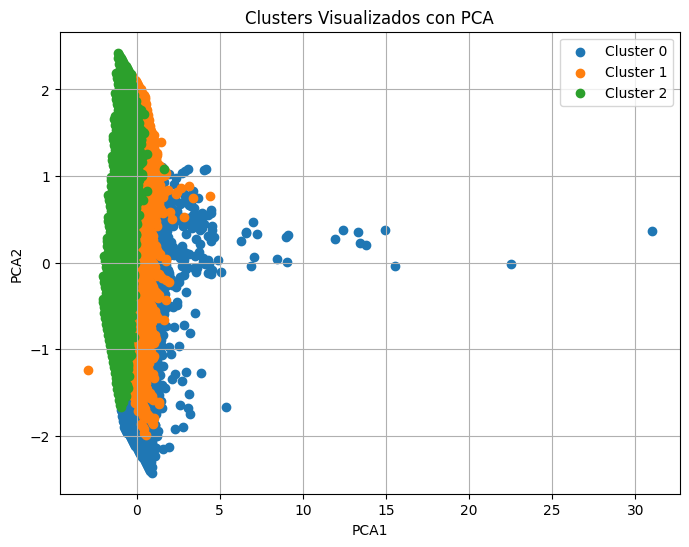

In [ ]:
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = df_copy[df_copy['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('Clusters Visualizados con PCA')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()


## Analizando los cluster


In [ ]:
cluster_summary = df_copy.groupby('Cluster').describe()
cluster_distribution = df_copy['Cluster'].value_counts(normalize=True)
print("Distribución de cada cluster")
print(cluster_distribution)


Cluster Distribution (Proportion of Points in Each Cluster):
Cluster
0    0.372062
2    0.325785
1    0.302154
Name: proportion, dtype: float64


In [ ]:
cluster_means = df_copy.groupby('Cluster').mean()
print(cluster_means)

                 año  mes_encoded  region_encoded  inversion_mensual  \
Cluster                                                                
0        2012.925240     6.196494        4.487595       5.011329e+06   
1        2018.391039     5.852138       17.140122       1.441587e+06   
2        2005.015867     5.912731       15.812240       3.041247e+05   

             PCA1      PCA2  
Cluster                      
0        0.636905 -0.444613  
1        0.094713  0.145759  
2       -0.815219  0.372583  


In [ ]:
df_copy['region'] = df['region']
regions_in_clusters = df_copy.groupby('Cluster')['region'].unique()


In [ ]:
print(regions_in_clusters)
regions_cluster_0 = regions_in_clusters[0]
print("Regiones del Cluster 0 con mejor predicción de mejora:")
print(regions_cluster_0)
cluster_0_data = df_copy[df_copy['Cluster'] == 0]

regions_highest_investment = cluster_0_data.groupby('region')['inversion_mensual'].sum().sort_values(ascending=False)
print(regions_highest_investment)


Cluster
0    [AMAZONAS, APURÍMAC, AREQUIPA, AYACUCHO, CAJAM...
1    [ÁNCASH, UCAYALI, MOQUEGUA, MADRE DE DIOS, PAS...
2    [ICA, JUNÍN, CUSCO, LAMBAYEQUE, CAJAMARCA, CAL...
Name: region, dtype: object
Regiones del Cluster 0 con mejor predicción de mejora:
['AMAZONAS' 'APURÍMAC' 'AREQUIPA' 'AYACUCHO' 'CAJAMARCA' 'CUSCO' 'CALLAO'
 'HUANCAVELICA' 'HUÁNUCO' 'ICA' 'JUNÍN' 'LA LIBERTAD' 'PASCO' 'LIMA'
 'LAMBAYEQUE']
region
CAJAMARCA       4.197628e+09
ICA             3.406278e+09
AREQUIPA        1.469275e+09
JUNÍN           1.438742e+09
CUSCO           1.239139e+09
AYACUCHO        1.226753e+09
LA LIBERTAD     7.851539e+08
LIMA            6.734262e+08
HUANCAVELICA    2.756821e+08
APURÍMAC        1.889768e+08
HUÁNUCO         1.243451e+08
PASCO           1.162765e+08
AMAZONAS        7.087848e+06
CALLAO          4.831000e+05
LAMBAYEQUE      0.000000e+00
Name: inversion_mensual, dtype: float64


In [ ]:
regions_cluster_1 = regions_in_clusters[1]
print("Regiones del Cluster 1 con mejor predicción de mejora:")
print(regions_cluster_1)

Regiones del Cluster 1 con mejor predicción de mejora:
['ÁNCASH' 'UCAYALI' 'MOQUEGUA' 'MADRE DE DIOS' 'PASCO' 'PIURA' 'LORETO'
 'LIMA' 'TUMBES' 'TACNA' 'SAN MARTÍN' 'PUNO' 'LAMBAYEQUE' 'LA LIBERTAD'
 'JUNÍN' 'ICA' 'HUÁNUCO' 'HUANCAVELICA']


In [ ]:
regions_cluster_2 = regions_in_clusters[2]
print("Regiones del Cluster 2 con mejor predicción de mejora:")
print(regions_cluster_2)

Regiones del Cluster 2 con mejor predicción de mejora:
['ICA' 'JUNÍN' 'CUSCO' 'LAMBAYEQUE' 'CAJAMARCA' 'CALLAO' 'HUANCAVELICA'
 'HUÁNUCO' 'LA LIBERTAD' 'MADRE DE DIOS' 'LIMA' 'MOQUEGUA' 'LORETO'
 'ÁNCASH' 'PIURA' 'TACNA' 'PUNO' 'SAN MARTÍN' 'PASCO' 'TUMBES' 'UCAYALI']


# Conclusiones:

1. Se espera crecimiento en el sector minero para las diversas regiones en los proximos años.
2. Se han creado clusters para poder visualizar las regiones que presentan mejor inversion mensual, siendo el cluster 0 el grupo con mayor inversión mensual.
3. Los diversos modelos de Machine Learning aplicando hiperparametrros tienen mejor performance en nuestro caso.
4. Realizar mododelos de Clustering con K-means es el mas optimo para identificar las regiones con mejor crecimiento, siendo LA LIBERTAD e ICA


